In [16]:
import cv2
from skimage.io import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

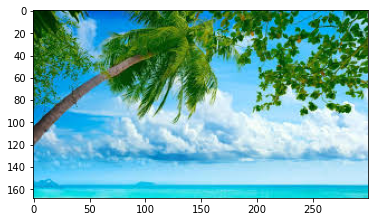

In [25]:
img = imread(os.path.join("M2.jpg"))
img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img.shape
plt.imshow(img)

In [26]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [27]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [41]:
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image1 = res.reshape((img_convert.shape))

(Text(0.5, 1.0, 'K=4 ile segmente edilen resim'), ([], []), ([], []))

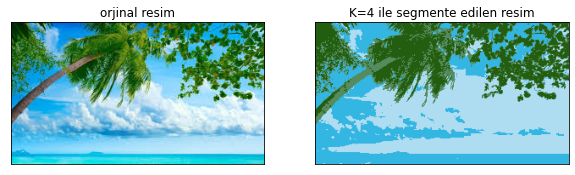

In [51]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
#original image
plt.subplot(2,2,1),plt.imshow(img)
plt.title('orjinal resim'), plt.xticks([]), plt.yticks([])
#image 2
plt.subplot(2,2,2),plt.imshow(result_image1)
plt.title('K=4 ile segmente edilen resim'), plt.xticks([]), plt.yticks([])

In [80]:
masked_image=np.copy(img)

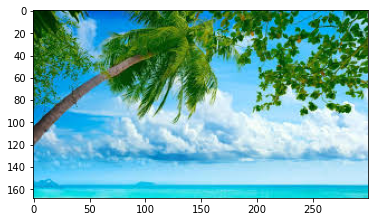

In [81]:
plt.imshow(masked_image)

In [82]:
masked_image=masked_image.reshape((-1,3))
cluster=2
masked_image[label==cluster]=[0,0,0]
masked_image=masked_image.reshape(result_image1.shape)
plt.imshow(masked_image)
plt.show()

IndexError: boolean index did not match indexed array along dimension 1; dimension is 3 but corresponding boolean dimension is 1